# Polynomial Regression 
### Camara Data Maximum Speed Prediction

## Data preprocessing

## Importing the libraries

In [1]:
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics, svm, ensemble
import pandas as pd
import tabpy_client

In [2]:
from sklearn import set_config
set_config(print_changed_only=False)

## Importing the dataset

In [3]:
# Read the csv file into a pandas DataFrame
speed = pd.read_csv('camera_data_preparation_max_speed.csv')
speed.head()

,Unnamed: 0,Lane,Weekday,Time of Day,WeekdayTimeOfDayMaxSpeed
0,6,2.0,Wednesday,0,68.510
1,27,2.0,Wednesday,0,68.510
2,35,2.0,Wednesday,0,68.510
3,104,2.0,Wednesday,1,68.828
4,105,2.0,Wednesday,1,68.828


In [4]:
# speed = speed.drop(columns=['Weekday'])
# speed.head()

In [5]:
# Use LabelEncoder to convert textual classifications to numeric. 
# We will use the same encoder later to convert them back.
encoder = preprocessing.LabelEncoder()
speed['Weekday'] = encoder.fit_transform(speed['Weekday'])

In [6]:
speed.head()

,Unnamed: 0,Lane,Weekday,Time of Day,WeekdayTimeOfDayMaxSpeed
0,6,2.0,6,0,68.510
1,27,2.0,6,0,68.510
2,35,2.0,6,0,68.510
3,104,2.0,6,1,68.828
4,105,2.0,6,1,68.828


## Encoding categorical data

### Encoding the Independent Variable

In [7]:
speed = pd.get_dummies(speed)
speed.head()

,Unnamed: 0,Lane,Weekday,Time of Day,WeekdayTimeOfDayMaxSpeed
0,6,2.0,6,0,68.510
1,27,2.0,6,0,68.510
2,35,2.0,6,0,68.510
3,104,2.0,6,1,68.828
4,105,2.0,6,1,68.828


In [8]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = speed[["Lane","Weekday","Time of Day"]]
y = speed["WeekdayTimeOfDayMaxSpeed"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(2698, 3) (2698, 1)


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Lane,Weekday,Time of Day
220,2.0,3,3
1317,1.0,1,1
705,2.0,0,1
449,2.0,2,3
1186,1.0,0,4


# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [11]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

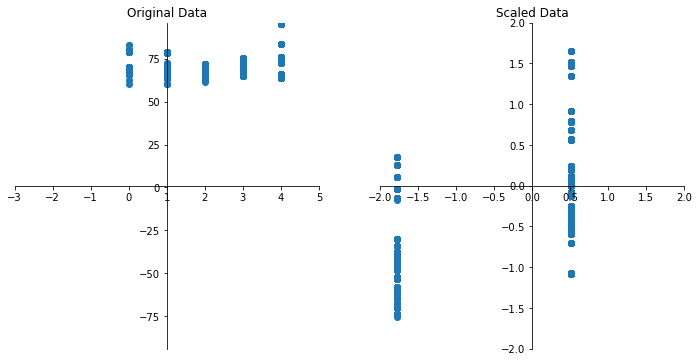

In [12]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Time of Day"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Time of Day"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression
lin_reg(X, y)


LinearRegression(copy_X=True,
                 fit_intercept=      Lane  Weekday  Time of Day
0      2.0        6            0
1      2.0        6            0
2      2.0        6            0
3      2.0        6            1
4      2.0        6            1
...    ...      ...          ...
2693   2.0        5            4
2694   1.0        5            4
2695   2.0        5            4
2696   2.0        5            4
2697   2.0        5            4

[2698 rows x 3 columns],
                 n_jobs=None,
                 normalize=array([[68.51 ],
       [68.51 ],
       [68.51 ],
       ...,
       [74.792],
       [74.792],
       [74.792]]))

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[70.26 65.58]
 [70.19 71.69]
 [70.08 74.17]
 ...
 [68.06 67.83]
 [70.26 65.58]
 [73.21 79.11]]


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7175427099084515

In [17]:
X_test

,Lane,Weekday,Time of Day
1339,2.0,1,2
1222,2.0,2,2
1106,2.0,4,3
812,2.0,2,3
1231,2.0,2,3
...,...,...,...
729,1.0,0,2
821,2.0,2,4
783,1.0,2,2
1736,2.0,1,2


In [18]:
y_pred

array([[70.26],
       [70.19],
       [70.08],
       [70.85],
       [70.85],
       [70.71],
       [69.8 ],
       [71.71],
       [68.06],
       [76.3 ],
       [72.34],
       [70.7 ],
       [77.54],
       [77.54],
       [75.51],
       [60.9 ],
       [72.74],
       [89.84],
       [67.84],
       [70.33],
       [73.51],
       [67.13],
       [70.7 ],
       [69.8 ],
       [65.57],
       [73.5 ],
       [64.21],
       [70.71],
       [75.51],
       [71.41],
       [70.7 ],
       [79.73],
       [72.74],
       [71.71],
       [70.19],
       [70.85],
       [79.73],
       [73.5 ],
       [72.34],
       [76.3 ],
       [89.84],
       [70.65],
       [70.85],
       [76.3 ],
       [70.65],
       [68.92],
       [65.63],
       [73.11],
       [68.36],
       [77.52],
       [68.92],
       [68.73],
       [67.4 ],
       [70.33],
       [65.41],
       [66.18],
       [73.11],
       [69.8 ],
       [65.63],
       [66.18],
       [72.34],
       [70.71],
       [

In [19]:
y_test

array([[65.58],
       [71.69],
       [74.17],
       [65.64],
       [65.64],
       [71.44],
       [69.9 ],
       [70.83],
       [67.83],
       [75.96],
       [70.55],
       [72.5 ],
       [75.33],
       [75.33],
       [78.2 ],
       [63.69],
       [69.41],
       [94.98],
       [63.45],
       [68.73],
       [67.59],
       [63.07],
       [72.5 ],
       [69.9 ],
       [64.58],
       [70.71],
       [64.03],
       [71.44],
       [78.2 ],
       [73.03],
       [72.5 ],
       [74.79],
       [69.41],
       [70.83],
       [71.69],
       [65.64],
       [74.79],
       [70.71],
       [70.55],
       [75.96],
       [94.98],
       [68.21],
       [65.64],
       [75.96],
       [68.21],
       [71.87],
       [65.29],
       [68.15],
       [65.33],
       [75.29],
       [71.87],
       [68.83],
       [63.72],
       [68.73],
       [66.71],
       [65.87],
       [68.15],
       [69.9 ],
       [65.29],
       [65.87],
       [70.55],
       [71.44],
       [

In [20]:
pd.DataFrame(X_train).to_csv("X_train.csv")

In [21]:
# Individual function to use the model with params Time of day, lane, day of week indicated as binary (0,1) sequence

result = regressor.predict(poly_reg.fit_transform([[0,4,2]]))
result

array([[93.56]])

In [22]:
# Connect to TabPy server using the client library
# tabpy must be starter on console first
connection = tabpy_client.Client('http://localhost:9004/')

In [23]:
# The function to be used in tableau to get a speed prediction
def FindMaxSpeed(iTimeOfDay, iLane, iDay):
    X = np.column_stack([iLane, iDay,iTimeOfDay])
    return regressor.predict(poly_reg.fit_transform(X)).tolist()


In [24]:
# Deploy the end point to be used by tableu
connection.deploy('GetMaxSpeed',
                  FindMaxSpeed,
                  'Returns expected speed for lane and day of week combination', override = True)

In [25]:
connection.query('GetMaxSpeed',1,3,3)

{'response': [[64.3290913085921]],
 'version': 12,
 'model': 'GetMaxSpeed',
 'uuid': '7064207b-6e35-4a90-a1e8-93c2b772ef21'}